<h1 align = center> FINAL MACHINE LEARNING PROJECT NOTEBOOK (IBM) </h1>
<hr>

## Content

#### Description:

Classification techniques are modeled to predict whether a customer can pay a loan or not, with the following algorithms: K-Nearest Neighbor (KNN), Decision Trees, Support Vector Machines (SVM) and Logistic Regression.

1. You must load the data from the csv file, steps 1 and 2 at the beginning of the notebook. This set of data is useful for all classification algorithms provided in the notebook. Therefore, the data set must be loaded before executing any algorithm.
2. Import the general libraries for the correct functioning of each classification algorithm.
3. Install conda. This is necessary to use a library that allows you to create an image in the decision tree algorithm.
4. Execute the plot_confusion_matrix function, to graph the confusion matrix.
5. Import the libraries needed for each classification algorithm, are at the beginning of each title of these algorithms.
6. Execute each step described for each classification algorithm, including the evaluation metrics for each of them.

_Note: in some cases, a visualization and analysis of the data is carried out._

- Upload csv file that contains a bank's customer loan history.
- Import libraries for the correct functioning of the algorithms.

#### Classification algorithms:

I.  K-Nearest Neighbor (KNN)

II.  Decision Trees

III. Support Vector Machines (SVM)

IV. Logistic Regression

<hr>
<h1 align = center> CLASSIFICATION MACHINE LEARNING </h1>
<hr>

# Load loans dataset
1. Loans dataset is in this same project __"ProjectMachineLearning"__ in __Data assets__, called __"loans.csv"__. 

    Run this code to import the dataset.

In [43]:
# The code was removed by Watson Studio for sharing.

## Load Data From CSV File

2. __Load__ "loans.csv" file

### About the dataset

We will use a set of loan data to predict whether a customer can pay a loan or not. 
Typically, the banks have a history of loans from their customers, where they know the customers who have paid and those who have not.

This data set provides information to help you predict when you should approve a loan.

The dataset includes information about:

- Customer credit references: (__credit_references__)
- Level of client studies: none(0), primary (1), secondary (2) and university (3). (__education__)
- Customer income money: (__incomes__)
- Customer age: (__age__)
- Customer gender: male(0) and female (1). (__gender__)
- The customer has his own house: yes(0) and not(1). (__own_house__)
- Number of customer jobs: (__jobs__)
- The customer is married: yes(0) and not(1). (__marital__)
- Number of people dependent on the customer: (__dependents__)
- Number of children of the customer: (__sons__)
- The customer is defaulter: yes(0) and not(1). (__defaulter__)

In [44]:
#View head dataset
df = pd.read_csv(body)
df.head()

,credit_references,education,incomes,age,gender,own_house,jobs,marital,dependents,sons,defaulter
0,2,3,40000,34,0,0,2,0,3,1,1
1,5,2,12000,24,0,1,1,1,0,0,0
2,4,2,15000,26,1,1,2,0,1,0,0
3,10,3,50000,41,1,0,3,0,4,2,1
4,7,2,38000,32,0,1,4,1,2,1,1


## Import required  general libraries 
3. Import libraries for the correct functioning of the __algorithms__.

In [45]:
#General Libraries
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

import scipy.optimize as opt

#Train test split
from sklearn.model_selection import train_test_split

#Evaluation metrics
from sklearn import metrics

#Metrics -> Classification Report
from sklearn.metrics import classification_report

#Metrics -> Confusion matrix
from sklearn.metrics import confusion_matrix

#Metrics -> F1 Score
from sklearn.metrics import f1_score

#Metrics -> Jaccar index
from sklearn.metrics import jaccard_similarity_score

#Metrics -> Logg Loss
from sklearn.metrics import log_loss

## Define function for plot confusion matrix
4. Run this code for define the function plot_confusion_matrix

    This plot function a matrix of confusion

In [46]:
#Function to plot confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Install conda
This is necessary to load an image in __decision trees__

In [47]:
#Install conda environment 
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-1                    --> 2019.9.11-hecc5488_0 conda-forge
    certifi:         2019.6.16-py36_1     

<hr>
<h2> Implementation with classification algorithms </h2>
<hr>

<h1 align = "center"> I. K-Nearest Neighbor (KNN) </h1>

## Import required KNN libraries
1. __Import__ libraries for the correct functioning of the __KNN algorithm__.

In [48]:
#Libraries KNN

#Classifier Neighbors
from sklearn.neighbors import KNeighborsClassifier

## Data Visualization and Analysis

### See how many of each class is in our data set 
Total __defaulters__

In [49]:
#View total defaulters
# 0 = yes, 1 = not
df['defaulter'].value_counts()

0    18
1    12
Name: defaulter, dtype: int64

__Result__: 18 defaulters and 12 not defaulters

### Visualization customer income

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef841a6d68>]],
      dtype=object)

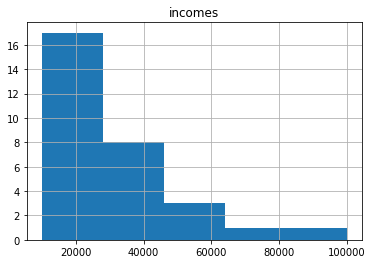

In [50]:
#Graphic historical
df.hist(column='incomes', bins=5)

### View dataset columns

In [51]:
#Get columns
df.columns

Index(['credit_references', 'education', 'incomes', 'age', 'gender',
       'own_house', 'jobs', 'marital', 'dependents', 'sons', 'defaulter'],
      dtype='object')

## Feature set (X)

2. __Define__ feature set (X)

     _Notice: first, you most load loans __dataset__, is at the beginning of the notebook (steps 1-2)_.

In [52]:
#Feature -> array X
#View dataset in array X
X = df[['credit_references', 'education', 'incomes', 'age', 'gender','own_house', 'jobs', 'marital', 'dependents', 'sons', 'defaulter']].values
X[0:5]

array([[    2,     3, 40000,    34,     0,     0,     2,     0,     3,
            1,     1],
       [    5,     2, 12000,    24,     0,     1,     1,     1,     0,
            0,     0],
       [    4,     2, 15000,    26,     1,     1,     2,     0,     1,
            0,     0],
       [   10,     3, 50000,    41,     1,     0,     3,     0,     4,
            2,     1],
       [    7,     2, 38000,    32,     0,     1,     4,     1,     2,
            1,     1]])

3. __Normalize__ feature set (X)

In [53]:
#Normalize dataset
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print('Dataset normalize')
X[0:5]

Dataset normalize


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.75351175,  1.01413498,  0.43736314,  0.33807885, -0.81649658,
        -1.52752523, -0.36041653, -1.22474487,  0.87447463,  0.07179582,
         1.22474487],
       [ 0.04432422, -0.77551498, -1.03217701, -1.22228507, -0.81649658,
         0.65465367, -1.19214699,  0.81649658, -1.14354375, -1.00514142,
        -0.81649658],
       [-0.2216211 , -0.77551498, -0.87472628, -0.91021229,  1.22474487,
         0.65465367, -0.36041653, -1.22474487, -0.47087096, -1.00514142,
        -0.81649658],
       [ 1.37405084,  1.01413498,  0.96219891,  1.43033359,  1.22474487,
        -1.52752523,  0.47131393, -1.22474487,  1.54714743,  1.14873305,
         1.22474487],
       [ 0.57621487, -0.77551498,  0.33239599,  0.02600607, -0.81649658,
         0.65465367,  1.30304439,  0.81649658,  0.20180184,  0.07179582,
         1.22474487]])

## Target set (y)

4. __Define__ target set (y)

    Label of our class is __defaulter__

In [54]:
#Array targets "y" 
# 0 = yes, 1 = not
y = df['defaulter'].values
print('Array targets:', y[0:20])

Array targets: [1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0]


## Train Test Split

5. __Define__: X_train set, X_test set, y_train set and y_test set.

    24 rows for __train__

    6 rows for __test__

In [55]:
#Train/Test split
# 24 rows train, 6 rows test, 11 columns (features)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2) 

print ('Dimension Train Set:', X_train.shape,  y_train.shape)
print ('Dimension Test Set:', X_test.shape,  y_test.shape)

Dimension Train Set: (24, 11) (24,)
Dimension Test Set: (6, 11) (6,)


## Classifier implementing K-Nearest Neighbors (KNN)

#### Building the model with KNN

### Training
6. __Define__ value of k.
    
    We will fit the data with the training feature matrix X_trainset and training response vector y_trainset.
    
    We will first create an instance of the LogisticRegression Classifier called __logisticReg__.

    Lets start the algorithm with __k=3__ for now, then ee will create an instance of the KNeighborsClassifier  called __neigh__:

In [56]:
#Implementing  K-Nearest Neighbors
#Train Model and Predict  
k = 3 #K (Number Neighbors) supposition
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Predicting
7. we can use the model to __predict__ the test set

In [57]:
#Prediction (yhat)
yhat = neigh.predict(X_test)
print('Y hat (prediction):')
yhat[0:6]

Y hat (prediction):


array([0, 1, 1, 1, 0, 0])

In [58]:
#Y test true
print('Y test (true):')
y_test[0:6]

Y test (true):


array([0, 1, 1, 1, 0, 0])

## Evaluation Metrics

### Accuracy evaluation 

Train set accuracy (y train, x train)

Test set accuracy (y test, y hat)

In [59]:
#Evaluation metrics
#Compute accuracy score
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  1.0


### Confusion Matrix
The sum of the __main diagonal__ values is the total correct predictions.
In this case is 6.

The sum of the __secondary diagonal__ values is the total incorrect predictions.
In this case is 0.

In [17]:
#Confusion Matrix
matrixConfusion = confusion_matrix(y_test, yhat)
print('Confusion Matrix:')
print(matrixConfusion)

Confusion Matrix:
[[3 0]
 [0 3]]


#### Plot non-normalized confusion matrix
_Notice: It is neccesary run the function_ plot_confusion_matrix, _is at the beginning of the notebook (step 4)._

Confusion matrix, without normalization
[[3 0]
 [0 3]]


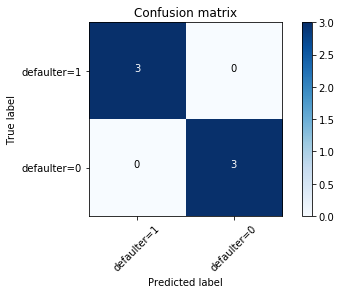

In [60]:
plt.figure()
plot_confusion_matrix(matrixConfusion, classes=['defaulter=1','defaulter=0'],normalize= False,  title='Confusion matrix')

### F1-Score

In [61]:
#Compute accuracy with F1 Score 
print('Accuracy F1 Score: ', f1_score(y_test, yhat, average='weighted')) 

Accuracy F1 Score:  1.0


### Jaccard Index

In [62]:
#Compute accuracy with Jaccard Index
jaccardIndex = jaccard_similarity_score(y_test, yhat)
print('Accuracy Jaccard Index: ', jaccardIndex)

Accuracy Jaccard Index:  1.0


## Find the best K
We can calculate the __accuracy__ of KNN for different Ks.

In [63]:
#Find the best K
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 0.83333333, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.83333333, 1.        ])

#### Plot model accuracy for Different number of Neighbors

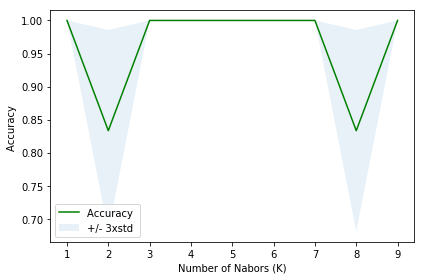

In [64]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

__Result__: we can see that the accuracy is equal to 1, when k is equal to 1, 3, 4, 5, 6, 7 and 9

#### The best k

In [65]:
print( "The best accuracy was ", mean_acc.max(), " with k = ", mean_acc.argmax()+1) 

The best accuracy was  1.0  with k =  1


### Test with the best k = 1

In [66]:
k = 1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [67]:
#Prediction (yhat)
yhat = neigh.predict(X_test)
print('Y hat (prediction):')
yhat[0:6]

Y hat (prediction):


array([0, 1, 1, 1, 0, 0])

In [68]:
#Compute accuracy score
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  1.0


<h2> End K-Nearest Neighbor </h2>
<hr>

<h1 align = "center"> II. Decision Trees </h1>

## Import required Decision Trees libraries
1. __Import__ libraries for the correct functioning of the __Decision Trees algorithm__.

In [69]:
#Libraries Decision trees

#Classifier tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Libraries to see image tree
from sklearn.externals.six import StringIO
import pydotplus #(requires install panda)
import matplotlib.image as mpimg

## Feature set (X)

2. __Define__ feature set (X) -> represented by X1

     _Notice: first, you most load loans __dataset__, is at the beginning of the notebook (steps 1-2)_.

In [70]:
#Feature -> array X1
#View dataset in array X1
X1 = df[['credit_references', 'education', 'incomes', 'age', 'gender','own_house', 'jobs', 'marital', 'dependents', 'sons', 'defaulter']].values
X1[0:5]

array([[    2,     3, 40000,    34,     0,     0,     2,     0,     3,
            1,     1],
       [    5,     2, 12000,    24,     0,     1,     1,     1,     0,
            0,     0],
       [    4,     2, 15000,    26,     1,     1,     2,     0,     1,
            0,     0],
       [   10,     3, 50000,    41,     1,     0,     3,     0,     4,
            2,     1],
       [    7,     2, 38000,    32,     0,     1,     4,     1,     2,
            1,     1]])

## Target set (y)

3. __Define__ target set (y) -> represented by y1

    Label of our class is __defaulter__

In [71]:
#Array targets "y1" 
# 0 = yes, 1 = not
y1 = df['defaulter'].values
print('Array targets:', y1[0:20])

Array targets: [1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0]


## Train Test Split

4. __Define__: X_train1 set, X_test1 set, y_train1 set and y_test1 set.

    24 rows for __train__

    6 rows for __test__

In [72]:
#Train/Test split
# 24 rows train, 6 rows test, 11 columns (features)
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.2, random_state=2) 

print ('Dimension Train Set:', X_train1.shape,  y_train1.shape)
print ('Dimension Test Set:', X_test1.shape,  y_test1.shape)

Dimension Train Set: (24, 11) (24,)
Dimension Test Set: (6, 11) (6,)


## Classifier implementing Decision Trees

#### Building the model with Decision Trees

### Training
5. We will first create an instance of the DecisionTreeClassifier called __defaulterTree__.
Inside of the classifier, we specify criterion="entropy" so we can see the information gain of each node.

In [73]:
#Modeling
#Building classifier
defaulterTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
defaulterTree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

6. We will __fit__ the data with the training feature matrix X_train1 set and training response vector y_train1 set

In [74]:
#Fitted data
defaulterTree.fit(X_train1,y_train1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predicting
7. We can use the model to __predict__ the test set

    The predictions store it into a variable called __predTree__.

In [75]:
#Prediction (predTree)
predTree = defaulterTree.predict(X_test1)

In [76]:
#Prediction result
print ('Prediction vector: ', predTree [0:6])

Prediction vector:  [0 1 1 1 0 0]


In [77]:
#Target vector true
print ('True vector: ', y_test1 [0:6])

True vector:  [0 1 1 1 0 0]


## Evaluation Metrics

### Accuracy evaluation 

Test set accuracy (y test1, predTree)

In [78]:
#Compute accuracy score
print("Accuracy Decision Trees: ", metrics.accuracy_score(y_test1, predTree))

Accuracy Decision Trees:  1.0


### F1-Score

In [79]:
#Compute accuracy with F1 Score 
print('Accuracy F1 Score: ', f1_score(y_test1, predTree, average='weighted')) 

Accuracy F1 Score:  1.0


### Jaccard Index

In [80]:
#Compute accuracy with Jaccard Index
jaccardIndex = jaccard_similarity_score(y_test1, predTree)
print('Accuracy Jaccard Index: ', jaccardIndex)

Accuracy Jaccard Index:  1.0


## Visualization Decision Tree
Lets visualize the tree

_Notice: You might need install conda, is at the beginning of the notebook._

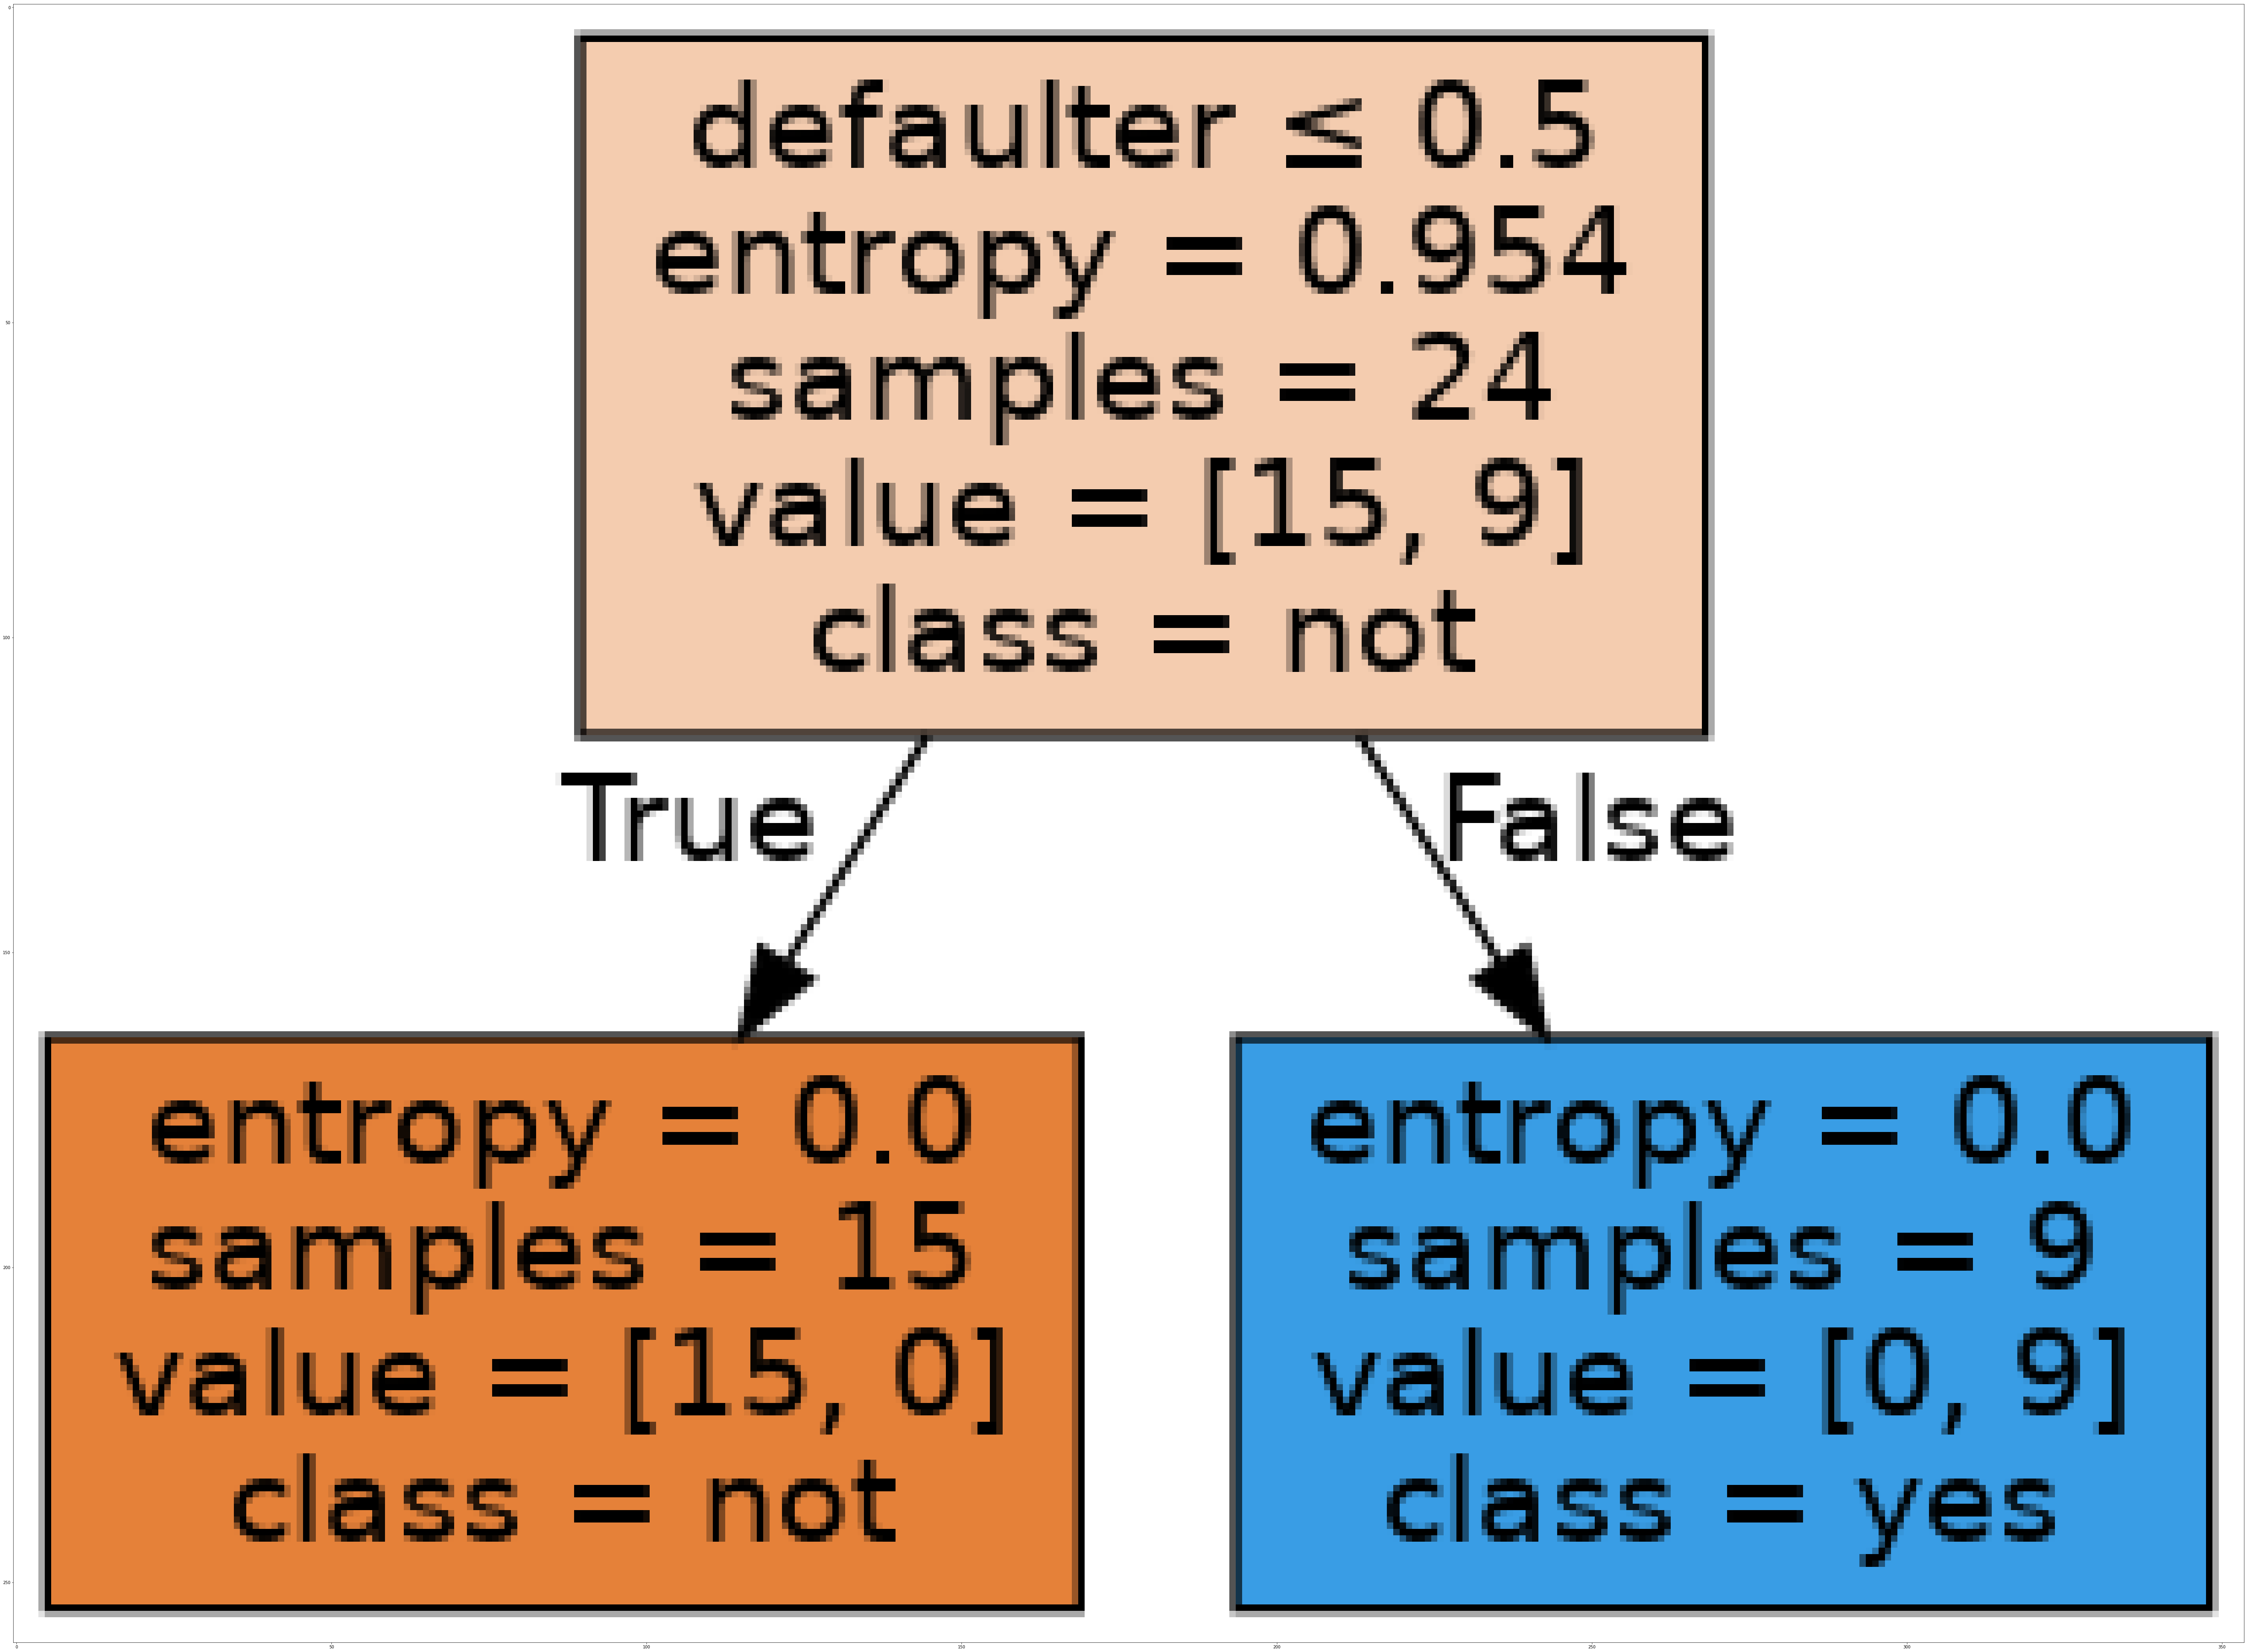

In [81]:
dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[0:11]
targetNames = df["defaulter"].unique().tolist()
out=tree.export_graphviz(defaulterTree,feature_names=featureNames, out_file=dot_data, filled=True, class_names= np.unique(['yes', 'not']), special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<h2> End Decision Trees </h2>
<hr>

<h1 align = "center"> III. Support Vector Machine (SVM) </h1>

## Import required SVM libraries
1. __Import__ libraries for the correct functioning of the __SVM algorithm__.

In [82]:
#Libraries SVM
from sklearn import svm
import pylab as pl

## Data Visualization and Analysis

#### Lets look at the distribution of the classes based on incomes thickness and age of cell size:

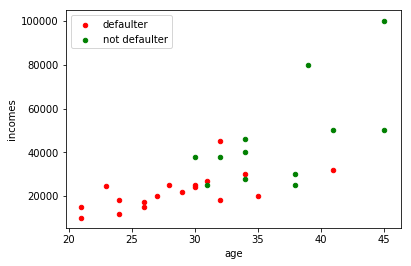

In [83]:
ax = df[df['defaulter'] == 0][0:50].plot(kind='scatter', x='age', y='incomes', color='Red', label='defaulter');
df[df['defaulter'] == 1][0:50].plot(kind='scatter', x='age', y='incomes', color='Green', label='not defaulter', ax=ax);
plt.show()

## Feature set (X)

2. __Define__ feature set (X) -> represented by X2
  
  _Notice: first, you most load loans __dataset__, is at the beginning of the notebook (steps 1-2)_.

In [86]:
#Feature -> array X2
#View dataset in array X2
X2 = df[['credit_references', 'education', 'incomes', 'age', 'gender','own_house', 'jobs', 'marital', 'dependents', 'sons', 'defaulter']].values
X2[0:5]

array([[    2,     3, 40000,    34,     0,     0,     2,     0,     3,
            1,     1],
       [    5,     2, 12000,    24,     0,     1,     1,     1,     0,
            0,     0],
       [    4,     2, 15000,    26,     1,     1,     2,     0,     1,
            0,     0],
       [   10,     3, 50000,    41,     1,     0,     3,     0,     4,
            2,     1],
       [    7,     2, 38000,    32,     0,     1,     4,     1,     2,
            1,     1]])

## Target set (y)

3. __Define__ target set (y) -> represented by y2

    Label of our class is __defaulter__

In [85]:
#Array targets "y2" 
# 0 = yes, 1 = not
y2 = np.asarray(df['defaulter'])
print('Array targets:', y2[0:20])

Array targets: [1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0]


## Train Test Split

4. __Define__: X_train2 set, X_test2 set, y_train2 set and y_test2 set.

    24 rows for __train__

    6 rows for __test__

In [87]:
#Train test split
# 24 rows train, 6 rows test, 11 columns (features)
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y2, test_size=0.2, random_state=2) 

print ('Dimension Train Set:', X_train2.shape,  y_train2.shape)
print ('Dimension Test Set:', X_test2.shape,  y_test2.shape)

Dimension Train Set: (24, 11) (24,)
Dimension Test Set: (6, 11) (6,)


## Classifier implementing SVM

#### Building the model with SVM

### Training, Predicting and Evaluation Metrics
5. We found the best __kernel function__
    - Radial basis function (RBF)
    - Sigmoid
    - Linear
6. We can use the model to __predict__ the test set.
   The predictions store it into a variable called yhat2.
7. Predict set __accuracy__

#### Kernel function with Radial Basis Function (RBF)

In [88]:
#Test 1 kernel with Radial basis function (RBF)
clf = svm.SVC(kernel='rbf')
clf.fit(X_train2, y_train2) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Predicting

In [89]:
#Y Prediction (yhat2) with RBF
yhat2 = clf.predict(X_test2)
print('Result prediction RBF (yhat): ', yhat2 [0:6])

Result prediction RBF (yhat):  [0 0 0 0 0 0]


In [90]:
#Target vector true
print('True vector: ', y_test2 [0:6])

True vector:  [0 1 1 1 0 0]


#### Accuracy with F1-Score

In [91]:
#Compute accuracy with F1 Score for prediction with RBF
print('Accuracy F1 Score (RBF): ', f1_score(y_test2, yhat2, average='weighted')) 

Accuracy F1 Score (RBF):  0.3333333333333333


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Accuracy with Jaccard Index

In [92]:
#Compute accuracy with Jaccard Index for prediction with RBF
jaccardIndex = jaccard_similarity_score(y_test2, yhat2)
print('Accuracy Jaccard Index (RBF): ', jaccardIndex)

Accuracy Jaccard Index (RBF):  0.5


In [93]:
#It does not run
#clf = svm.SVC(kernel='poly')
#clf.fit(X_train2, y_train2) 

#### Kernel function with Sigmoid

In [94]:
#Test 2 kernel
#Kernel function with Sigmoid
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train2, y_train2) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Predicting

In [95]:
#Y Prediction (yhat2) with Sigmoid
yhat2 = clf.predict(X_test2)
print('Result prediction Sigmoid (yhat): ', yhat2 [0:6])

Result prediction Sigmoid (yhat):  [0 0 0 0 0 0]


In [96]:
#Target vector true
print('True vector: ', y_test2 [0:6])

True vector:  [0 1 1 1 0 0]


#### Accuracy with F1-Score

In [97]:
#Compute accuracy with F1 Score for prediction with Sigmoid
print('Accuracy F1 Score (Sigmoid): ', f1_score(y_test2, yhat2, average='weighted')) 

Accuracy F1 Score (Sigmoid):  0.3333333333333333


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Accuracy with Jaccard Index

In [98]:
#Compute accuracy with Jaccard Index for prediction with Sigmoid
jaccardIndex = jaccard_similarity_score(y_test2, yhat2)
print('Accuracy Jaccard Index (Sigmoid): ', jaccardIndex)

Accuracy Jaccard Index (Sigmoid):  0.5


#### Kernel function with Linear

In [99]:
#Test 3 kernel
#Kernel function with Linear
clf = svm.SVC(kernel='linear')
clf.fit(X_train2, y_train2) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Predicting

In [100]:
#Y Prediction (yhat2) with Linear
yhat2 = clf.predict(X_test2)
print('Result prediction Linear (yhat): ', yhat2[0:6])

Result prediction Linear (yhat):  [0 1 1 0 0 0]


In [101]:
print('True vector: ', y_test2 [0:6])

True vector:  [0 1 1 1 0 0]


#### Accuracy with F1-Score

In [102]:
#Compute accuracy with F1 Score for prediction with Linear
print('Accuracy F1 Score (Linear): ', f1_score(y_test2, yhat2, average='weighted')) 

Accuracy F1 Score (Linear):  0.8285714285714286


#### Accuracy with Jaccard Index

In [103]:
#Compute accuracy with Jaccard Index for prediction with Linear
jaccardIndex = jaccard_similarity_score(y_test2, yhat2)
print('Accuracy Jaccard Index (Linear): ', jaccardIndex)

Accuracy Jaccard Index (Linear):  0.8333333333333334


### Accuracy Score

The best __kernel function__ is __linear__ with accuracy: 0.8333333333333334

In [104]:
#Evaluation metrics
#Compute accuracy score
print('The best kernel function for this model is the type Linear, accuracy: ')
print("Train set Accuracy: ", metrics.accuracy_score(y_train2, clf.predict(X_train2)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test2, yhat2))

The best kernel function for this model is the type Linear, accuracy: 
Train set Accuracy:  0.8333333333333334
Test set Accuracy:  0.8333333333333334


<h2> End Support Vector Machine (SVM) </h2>
<hr>

<h1 align = "center"> IV. Logistic Regression (LR) </h1>

## Import required Logistic Regression libraries
1. __Import__ libraries for the correct functioning of the __Logistic Regression algorithm__.

In [105]:
#Libraries Logistic Regression

#Model Logistic Regression
from sklearn.linear_model import LogisticRegression

## Feature set (X)

2. __Define__ feature set (X) -> represented by X3

    _Notice: first, you most load loans __dataset__, is at the beginning of the notebook (steps 1-2)_.

In [106]:
#Feature -> array X3
#View dataset in array X3
X3 = df[['credit_references', 'education', 'incomes', 'age', 'gender','own_house', 'jobs', 'marital', 'dependents', 'sons', 'defaulter']].values
X3[0:5]

array([[    2,     3, 40000,    34,     0,     0,     2,     0,     3,
            1,     1],
       [    5,     2, 12000,    24,     0,     1,     1,     1,     0,
            0,     0],
       [    4,     2, 15000,    26,     1,     1,     2,     0,     1,
            0,     0],
       [   10,     3, 50000,    41,     1,     0,     3,     0,     4,
            2,     1],
       [    7,     2, 38000,    32,     0,     1,     4,     1,     2,
            1,     1]])

## Target set (y)

3. __Normalize__ feature set (X)

In [107]:
#Normalize dataset
X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
X3[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.75351175,  1.01413498,  0.43736314,  0.33807885, -0.81649658,
        -1.52752523, -0.36041653, -1.22474487,  0.87447463,  0.07179582,
         1.22474487],
       [ 0.04432422, -0.77551498, -1.03217701, -1.22228507, -0.81649658,
         0.65465367, -1.19214699,  0.81649658, -1.14354375, -1.00514142,
        -0.81649658],
       [-0.2216211 , -0.77551498, -0.87472628, -0.91021229,  1.22474487,
         0.65465367, -0.36041653, -1.22474487, -0.47087096, -1.00514142,
        -0.81649658],
       [ 1.37405084,  1.01413498,  0.96219891,  1.43033359,  1.22474487,
        -1.52752523,  0.47131393, -1.22474487,  1.54714743,  1.14873305,
         1.22474487],
       [ 0.57621487, -0.77551498,  0.33239599,  0.02600607, -0.81649658,
         0.65465367,  1.30304439,  0.81649658,  0.20180184,  0.07179582,
         1.22474487]])

4. __Define__ target set (y) -> represented by y3

    Label of our class is __defaulter__

In [108]:
#Array targets "y3" 
# 0 = yes, 1 = not
y3 = np.asarray(df['defaulter'])
print('Array targets:', y3[0:20])

Array targets: [1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0]


## Train Test Split

5. __Define__: X_train3 set, X_test3 set, y_train3 set and y_test3 set.

    24 rows for __train__

    6 rows for __test__

In [109]:
#Train/Test split
# 24 rows train, 6 rows test, 11 columns (features)
X_train3, X_test3, y_train3, y_test3 = train_test_split( X3, y3, test_size=0.2, random_state=2) 

print ('Dimension Train Set:', X_train3.shape,  y_train3.shape)
print ('Dimension Test Set:', X_test3.shape,  y_test3.shape)

Dimension Train Set: (24, 11) (24,)
Dimension Test Set: (6, 11) (6,)


## Classifier implementing Logistic Regression

#### Building the model with Logistic Regression

### Training
6. We will first create an instance of the LogisticRegression Classifier called __logisticReg__.

The version of Logistic Regression in Scikit-learn, support __regularization__. Regularization is a technique used to solve the overfitting problem in machine learning models. C parameter indicates __inverse__ of regularization strength which must be a positive float. Smaller values specify stronger regularization.

In [110]:
#Building model with Logistic Regression
logisticReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train3,y_train3)
logisticReg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting
7. We can use the model to __predict__ the test set

    The predictions store it into a variable called __yhat3__.

In [111]:
#Y Prediction (yhat3) with LR
yhat3 = logisticReg.predict(X_test3)
print('Result prediction LR (yhat): ', yhat3[0:6])

Result prediction LR (yhat):  [0 1 1 1 0 0]


In [112]:
print ('True vector: ', y_test3 [0:6])

True vector:  [0 1 1 1 0 0]


### Predicting proba

8. __predict_proba__ returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [113]:
yhat_prob = logisticReg.predict_proba(X_test3)
yhat_prob

array([[0.57912665, 0.42087335],
       [0.45189359, 0.54810641],
       [0.37957025, 0.62042975],
       [0.44882898, 0.55117102],
       [0.57505121, 0.42494879],
       [0.53649408, 0.46350592]])

## Evaluation Metrics

### Jaccard Index

In [114]:
#Compute accuracy with Jaccard Index
jaccardIndex = jaccard_similarity_score(y_test3, yhat3)
print('Accuracy Jaccard Index (LR): ', jaccardIndex)

Accuracy Jaccard Index (LR):  1.0


### Log Loss

In [115]:
#Compute accuracy with Logg Loss
print('Accuracy Logg Loss (LR): ', log_loss(y_test3, yhat_prob))

Accuracy Logg Loss (LR):  0.5660948114633221


### Confusion Matrix

In [116]:
#Compute accuracy with Confusion Matrix
#Confusion Matrix
matrixConfusion = confusion_matrix(y_test3, yhat3)
print('Confusion Matrix:')
print(matrixConfusion)

Confusion Matrix:
[[3 0]
 [0 3]]


#### Plot non-normalized confusion matrix
_Notice: It is neccesary run the function_ plot_confusion_matrix, _is at the beginning of the notebook (step 4)._

Confusion matrix, without normalization
[[3 0]
 [0 3]]


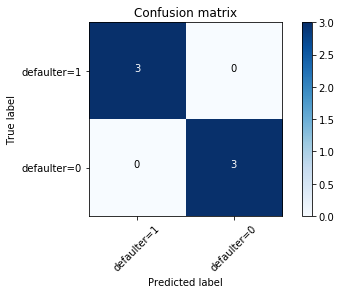

In [117]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrixConfusion, classes=['defaulter=1','defaulter=0'],normalize= False,  title='Confusion matrix')

In [118]:
print('Classification Report: ')
print (classification_report(y_test3, yhat3))
print('The average accuracy for this classifier is: 1.00')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

The average accuracy for this classifier is: 1.00


<h2> End Logistic Regression (LR) </h2>
<hr>